In [40]:
f = open('test.txt',encoding = 'UTF-8')#统计缺失特征
line = f.readlines()
file = 0
get = 0
flag = 0 
for l in line:
    file += 1
    a=l.split(',')
    ans = []
    for i in a :
        if i.find('step_count') > 0:
            get += 1
            #print(i)
        b = i.split(':')
        ans = ans + b
    #print(ans)
    if '"step_count"' not in ans:
        index = ans.index('"os_name"')
        flag += 1
        #print(ans[index+1])
print(file)
print(get)
print(flag)

50
1
49


In [13]:
import csv
import os
if os.path.exists('output.csv'):
    os.remove('output.csv')
f = open('脱敏数据.txt',encoding = 'UTF-8') #读取文件
file = open('output.csv','a',newline = '')
line = f.readlines()
csv_write = csv.writer(file)
for l in line:  
    data = l.split(',')   #将每行按,分割，
    ans = ['0']*14
    for i in data: #将分割后的数组元素，进行字符串的检索，提取特征项
        if i.find('bp_account') > 0:
            a = i.split(':')
            b = a[1].split('"')
            ans[0] = b[1]
        if i.find('is_rooted') > 0:
            a = i.split(':')
            ans[1] = a[1]
        elif i.find('is_emulator') > 0:
            a = i.split(':')
            ans[2] = a[1]
        elif i.find('has_xposed') > 0:
            a = i.split(':')
            ans[3] = a[1]
        elif i.find('imei') > 0:
            a = i.split(':')
            ans[4] = a[1]
        elif i.find('battery_status') > 0:
            a = i.split(':')
            ans[5] = a[1] 
        elif i.find('lapsed_real_time') > 0:
            a = i.split(':')
            if len(a[1])> 10:
                a[1] = str(int(a[1])/1000)
            ans[6] = a[1]
        elif i.find('gravity_change_count') > 0:
            a = i.split(':')
            ans[7] = a[1] 
        elif i.find('gyroscope_change_count') > 0:
            a = i.split(':')
            ans[8] = a[1] 
        elif i.find('magnetic_change_count') > 0:
            a = i.split(':')
            ans[9] = (a[1]) 
        elif i.find('gps_longitude') > 0:
            a = i.split(':')
            ans[10] = a[1]
        elif i.find('gps_latitude') > 0:
            a = i.split(':')
            ans[11] = a[1]
        elif i.find('collection_time') > 0:#时间戳有毫秒和秒两种表示，将其全部转为秒
            a = i.split(':')
            if len(a[1])> 10:
                a[1] = str(int(a[1])/1000)
            ans[12] = str(a[1])
        elif i.find('set_id_time') > 0:#时间戳有毫秒和秒两种表示，将其全部转为秒
            a = i.split(':')
            b = a[1].split('"')
            if len(b[1])> 10:
                b[1] = str(int(b[1])/1000)
            ans[13] = str(b[1])
    csv_write.writerow(ans)
print(ans)#显示存储样例
file.close()
f.close()

['180****1945', 'false', 'false', '0', '0', '4', '0', '19', '19', '16', '30.56088', '114.20295', '1542016185.51', '1542016171']


In [14]:
#清洗重复的日志
import pandas as pd
df = pd.read_csv('output.csv',header = None)
#df.columns = ["bp_account","is_rooted","is_emulator","has_xposed","imei","battery_status","lapsed_real_time","gravity_change_count","gyroscope_change_count","magnetic_change_count","gps_longitude","gps_latitude","collection_time"]
df = df.drop_duplicates()#清洗掉完全一样的日志内容
print(df.loc[:5,:])#显示前6条存储内容
#print(df)
df.to_csv('output.csv',index = None,header = 0)

            0      1      2      3                  4   5            6    7   \
0  180****1683  False  False  false  "862679038018071"   2  117744413.0    0   
1  199****1410  False  False  false  "867855027963825"   4  567622189.0   77   
2  153****1990  False  False  false  "862552036684618"   3   39068440.0  142   
3  189****2811  False  False  false   "A0000071EECB2D"   4   13303604.0  134   
4  153****0300  False  False  false  "863523035136313"   2     377816.0  115   
5  189****8126  False  False  false   "A1000058A9B9C1"   3  136273348.0   74   

    8    9          10         11            12            13  
0    0    0  115.84560  28.689034  1.542016e+09  1.542016e+09  
1   88  206    0.00000   0.000000  1.542016e+09  1.542016e+09  
2   85   98    0.00000   0.000000  1.542016e+09  1.542016e+09  
3  148   88  110.86489  39.655506  1.542016e+09  1.542016e+09  
4    0  600    0.00000   0.000000  1.542016e+09  1.542016e+09  
5   59   90    0.00000   0.000000  1.542016e+09  1.5420

In [4]:
#清洗重复的日志
import pandas as pd
df = pd.read_csv('output.csv',header = None)
#df.columns = ["bp_account","is_rooted","is_emulator","has_xposed","imei","battery_status","lapsed_real_time","gravity_change_count","gyroscope_change_count","magnetic_change_count","gps_longitude","gps_latitude","collection_time"]
df = df.loc[:,[0,4]]
df = df.drop_duplicates()#清洗掉完全一样的日志内容
print(df.loc[:5,:])#显示前6条存储内容
#print(df)
df.to_csv('output_imei.csv',index = None,header = 0)

             0                  4
0  180****1683  "862679038018071"
1  199****1410  "867855027963825"
2  153****1990  "862552036684618"
3  189****2811   "A0000071EECB2D"
4  153****0300  "863523035136313"
5  189****8126   "A1000058A9B9C1"


In [4]:
#提取所有的imei号,并统计重复数量，并存入imei_count.csv
import pandas as pd
import csv
import os
if os.path.exists('imei_count.csv'):
    os.remove('imei_count.csv')
f = open('imei_count.csv','a',newline = '')
csv_write = csv.writer(f)
csv_write.writerow(['imei','count'])
df = pd.read_csv('output_imei.csv',header = None)
# df_account = df.loc[:,0]#取bp_account
# df_imei = df.loc[:,4]#取imei号
# df = pd.concat([df_account,df_imei],axis =1)
df_imei_g = df.groupby([1])#将数据按imei号分组
i = 0
for imei,group in df_imei_g:
    ans =['0']*2
    count = list(group.count())
    imei_l = list(df_imei_g)
    #将组内重复元素去重
    group.drop_duplicates([0],keep = 'first',inplace =True)
    if imei != '0':
        ans[0] = imei_l[i][0] 
        ans[1] = count[1]
    #print(ans)
    if imei =='0':
        ans[0] = imei_l[i][0] 
        ans[1] = 0
    csv_write.writerow(ans)
    i += 1
    #print(ans)
f.close()
#读取前5条查看
df = pd.read_csv('imei_count.csv',header = 0,nrows = 5)
print(df)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                imei  count
0  "000000000000000"      1
1  "000010898405120"      1
2  "351952080251116"      1
3  "351952086336614"      1
4  "352097090075607"      1


In [3]:
#通过遍历办法统计二次特征并，存入imei_count.csv,此方法比上一方法速度更快
import pandas as pd
import os
import csv
if os.path.exists('imei_count.csv'):
    os.remove('imei_count.csv')
f = open('imei_count.csv','a',newline = '')
csv_write = csv.writer(f)
csv_write.writerow(['imei','count'])
file = open('output_imei.csv',newline = '')
line = csv.reader(file)
ans_bp = []
ans_imei = []
ans = [0]*2
for l in line:
    if l[1] not in ans_imei:
        ans_imei.append(l[1])
        ans_bp.append(0)
    if l[1] in ans_imei:
        if l[1] != '0':
            flag = ans_imei.index(l[1])
            num = ans_bp[flag] + 1
            ans_bp[flag] = num
for i in range(len(ans_bp)):
    ans[0] = ans_imei[i]
    ans[1] = ans_bp[i]
    csv_write.writerow(ans)
f.close()
#读取前5条查看
df = pd.read_csv('imei_count.csv',header = 0,nrows = 5)
print(df)

                   0  1
0  "862679038018071"  1
1  "867855027963825"  1
2  "862552036684618"  1
3   "A0000071EECB2D"  1
4  "863523035136313"  1


In [8]:
#计算gps的二次特征，计算出手机号前后不同时间gps的变化，并存入gps.csv
import pandas as pd
import csv
import os
if os.path.exists('gps.csv'):
    os.remove('gps.csv')
f = open('gps.csv','a',newline = '')
csv_write =csv.writer(f)
csv_write.writerow(['bp_account','gps_change'])
df = pd.read_csv('output.csv',header = None)
df.columns = ['bp_account','is_rooted',"is_emulator","has_xposed","imei","battery_status","lapsed_real_time","gravity_change_count","gyroscope_change_count","magnetic_change_count","gps_longitude","gps_latitude","collection_time","set_id_time"]
df = df.loc[:,['bp_account','gps_longitude','gps_latitude','collection_time']]
df.loc[:,'collection_time']= (df.loc[:,'collection_time']-1542000000)
df_account = df.groupby(['bp_account'])
ans = ['0']*2
for account,group in df_account:
    longitude = group['gps_longitude'].max()-group['gps_longitude'].min()
    latitude = group['gps_latitude'].max()-group['gps_latitude'].min()
    area  = longitude * latitude
    ans[0]=account
    ans[1]=area
    csv_write.writerow(ans)
#显示分组后的数据形式以及存储方式
print(group)
print(ans)
f.close()

       bp_account  gps_longitude  gps_latitude  collection_time
3745  199****9990     115.986244     29.726934        16203.707
['199****9990', 0.0]


In [27]:
#将数据归一化处理
import pandas as pd
df = pd.read_csv('output.csv',header = None)
df_imei = pd.read_csv('imei_count.csv',header = 0)#默认取0
df_gps = pd.read_csv('gps.csv',header = 0)
df_i = df_imei.loc[:,'imei'].tolist()#将imei_count中数据取出，存为列表，用于之后的替换
df_c = df_imei.loc[:,'count'].tolist()
df_a = df_gps.loc[:,'bp_account'].tolist()
df_g = df_gps.loc[:,'gps_change'].tolist()
df_x=df.loc[:,:3]
df_y=df.loc[:,4:]
df_bp = df_x[0]
df_x[0] = df_x[0].replace(df_a,df_g)
df_x[1] = df_x[1].replace([True,False],[1,0])#将true,false替换成1,0
df_x[2] = df_x[2].replace([True,False],[1,0])
df_x[3] = df_x[3].replace(['true','false'],[1,0])
df_y[4] = df_y[4].replace(df_i,df_c)
df = pd.concat([df_x,df_y],axis = 1)
#重新命名
df.columns = ['gps_change','is_rooted','is_emulator','has_xposed','imei','battery_status','lapsed_real_time','gravity_change_count','gyroscope_change_count','magnetic_change_count','gps_longitude','gps_latitude','collection_time','set_id_time']
#改变列表顺序，将需要归一化的数据放在一起
df = df[['is_rooted','is_emulator','has_xposed','battery_status','gps_change','imei','lapsed_real_time','gravity_change_count','gyroscope_change_count','magnetic_change_count','collection_time','gps_longitude','gps_latitude','set_id_time']]
df_i = df.loc[:,['is_rooted','is_emulator','has_xposed']]
df_l = df.loc[:,['battery_status','gps_change','imei','lapsed_real_time','gravity_change_count','gyroscope_change_count','magnetic_change_count']]
df_l= (df_l - df_l.min())/(df_l.max()-df_l.min()) #数据归一化
df = pd.concat([df_i,df_l],axis = 1)
df = pd.concat([df_bp,df],axis = 1)
print(df.loc[:5,:])#显示前6条存储数据
df.to_csv('output.csv',index = None)

             0  is_rooted  is_emulator has_xposed  battery_status  gps_change  \
0  180****1683          0            0          0             0.4    0.000000   
1  199****1410          0            0          0             0.8    0.000000   
2  153****1990          0            0          0             0.6    0.000000   
3  189****2811          0            0          0             0.8    0.624484   
4  153****0300          0            0          0             0.4    0.000000   
5  189****8126          0            0          0             0.6    0.000000   

       imei  lapsed_real_time  gravity_change_count  gyroscope_change_count  \
0  0.030303          0.012560              0.000000                0.000000   
1  0.030303          0.060547              0.127695                0.074387   
2  0.030303          0.004167              0.235489                0.071851   
3  0.060606          0.001419              0.222222                0.125106   
4  0.030303          0.000040        

In [14]:
#显示存好的数据
import pandas as pd
df = pd.read_csv('output.csv',header = 0,nrows = 5)
print(df)

             0  is_rooted  is_emulator  has_xposed  battery_status  \
0  180****1683          0            0           0             0.4   
1  199****1410          0            0           0             0.8   
2  153****1990          0            0           0             0.6   
3  189****2811          0            0           0             0.8   
4  153****0300          0            0           0             0.4   

   gps_change      imei  lapsed_real_time  gravity_change_count  \
0    0.000000  0.030303          0.012560              0.000000   
1    0.000000  0.030303          0.060547              0.127695   
2    0.000000  0.030303          0.004167              0.235489   
3    0.624484  0.060606          0.001419              0.222222   
4    0.000000  0.030303          0.000040              0.190713   

   gyroscope_change_count  magnetic_change_count  
0                0.000000               0.000000  
1                0.074387               0.325949  
2                0.0718

In [28]:
#聚类并显示结果
from sklearn.cluster import KMeans
import pandas as pd
df = pd.read_csv('output.csv') #读取文件
df = df.drop(columns = ['0'],axis =1)
clf_KMeans=KMeans(n_clusters=3)
cluster=clf_KMeans.fit_predict(df)
# #简单打印结果
r1 = pd.Series(clf_KMeans.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(clf_KMeans.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(df.columns) + [u'count'] #重命名表头
#详细输出原始数据及其类别
re = pd.concat([df, pd.Series(clf_KMeans.labels_, index = df.index)], axis = 1)  #详细输出每个样本对应的类别
re.columns = list(df.columns) + [u'type'] #重命名表头
re.to_csv('result.csv',index = None) #保存结果
print(r)
print(re.loc[:5,:]) #显示前6条数据

      is_rooted   is_emulator    has_xposed  battery_status    gps_change  \
0 -1.913400e-15  2.450980e-03 -1.370432e-16        0.651050  1.389769e-02   
1  1.073537e-03 -3.989864e-17  5.290907e-17        0.616103  1.473075e-02   
2  1.000000e+00  3.875969e-02  3.953488e-01        0.702326  4.202140e-07   

       imei  lapsed_real_time  gravity_change_count  gyroscope_change_count  \
0  0.207368          0.050342              0.134376                0.067179   
1  0.230811          0.079734              0.327012                0.244375   
2  0.127555          0.017630              0.032242                0.023498   

   magnetic_change_count  count  
0               0.155223   8568  
1               0.775795   1863  
2               0.160644    129  
   is_rooted  is_emulator  has_xposed  battery_status  gps_change      imei  \
0          0            0           0             0.4    0.000000  0.030303   
1          0            0           0             0.8    0.000000  0.030303   
2

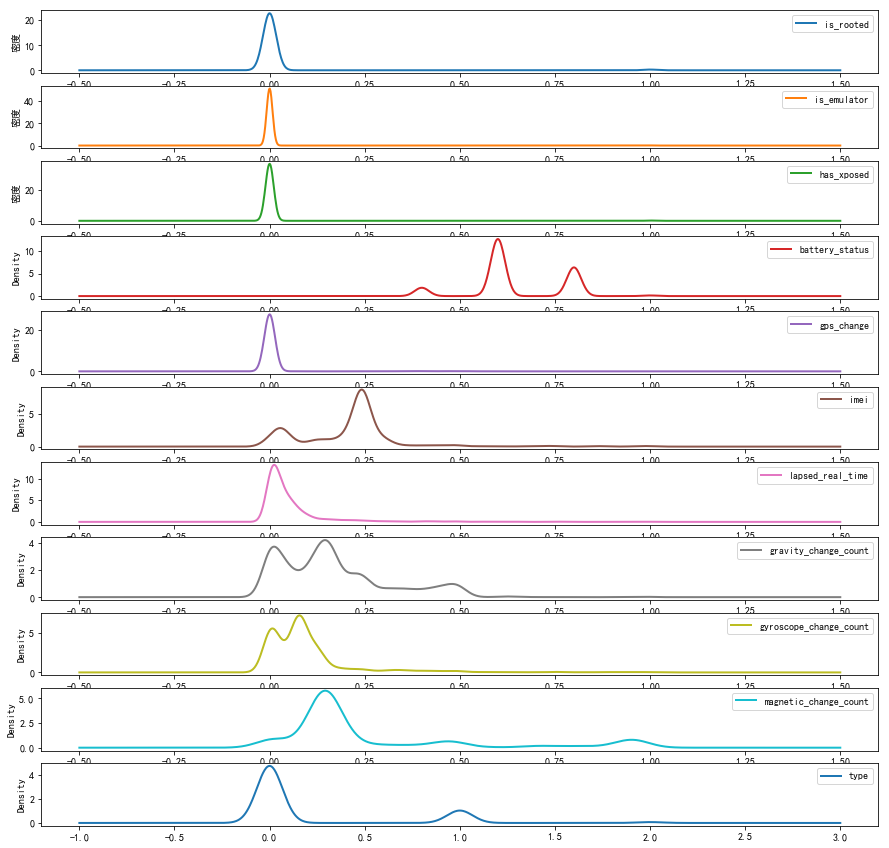

In [91]:
#显示数据分布
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('result.csv')
#df =df.drop(columns = ['bp_account'],axis =1)
plt.rc('figure',figsize = (15,15))
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
p = df.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
[p[i].set_ylabel(u'密度') for i in range(3)]
plt.legend()
plt.savefig('density curve.png')

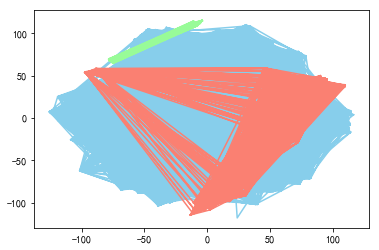

In [8]:
#降维显示数据
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('result.csv')
#print(df)
tsne = TSNE()
tsne.fit_transform(df) #进行数据降维
tsne = pd.DataFrame(tsne.embedding_, index = df.index) #转换数据格式
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
#不同类别用不同颜色和样式绘图
d = tsne[df.loc[:,'type'] == 0]
plt.plot(d[0], d[1], 'skyblue')
d = tsne[df.loc[:,'type'] == 1]
plt.plot(d[0], d[1], 'salmon')
d = tsne[df.loc[:,'type'] == 2]
plt.plot(d[0], d[1], 'palegreen')
plt.savefig('result.png')
plt.show()

In [31]:
import pandas as pd
df = pd.read_csv('result.csv',header=0)
df_count=df.groupby(['type'])
for df_type,group in df_count:
    l = list(group.count())
    print(df_type,l[1])

0 8568
1 1863
2 129


In [18]:
#查看特殊数据
import pandas as pd
df = pd.read_csv('output.csv',header = None)
df = df.groupby([0,12])
# df=df[df[3].isin(['0'])]
# df.columns = ["bp_account","is_rooted","is_emulator","imei","battery_status","lapsed_real_time","gravity_change_count","gyroscope_change_count","magnetic_change_count","set_id_time","gps_longitude","gps_latitude","collection_time"]
# print(df)
num =0
for i,group in df:
    group.drop_duplicates()
    count = group.count()
    num += count
    #print(i,group)
print(num[0])

10617


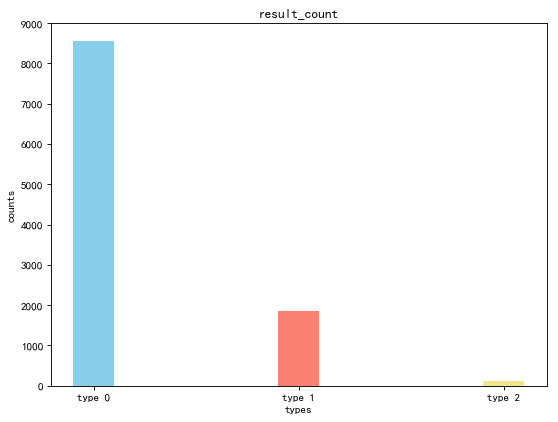

In [79]:
#绘制聚类结果柱状图
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('result.csv',header = 0)
df_count = df.groupby(['type'])
count = [0]*3
df_type = ['type 0', 'type 1','type 2']
i = 0
for typ,group in df_count:
    l = list(group.count())
    count[i] = l[1]
    i += 1
#print(count)
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.bar(df_type,count,width = 0.2,color = ["skyblue","salmon", "khaki",])
plt.title('result_count')
plt.xlabel('types')
plt.ylabel('counts')
plt.savefig('resultcount.png')
plt.show()


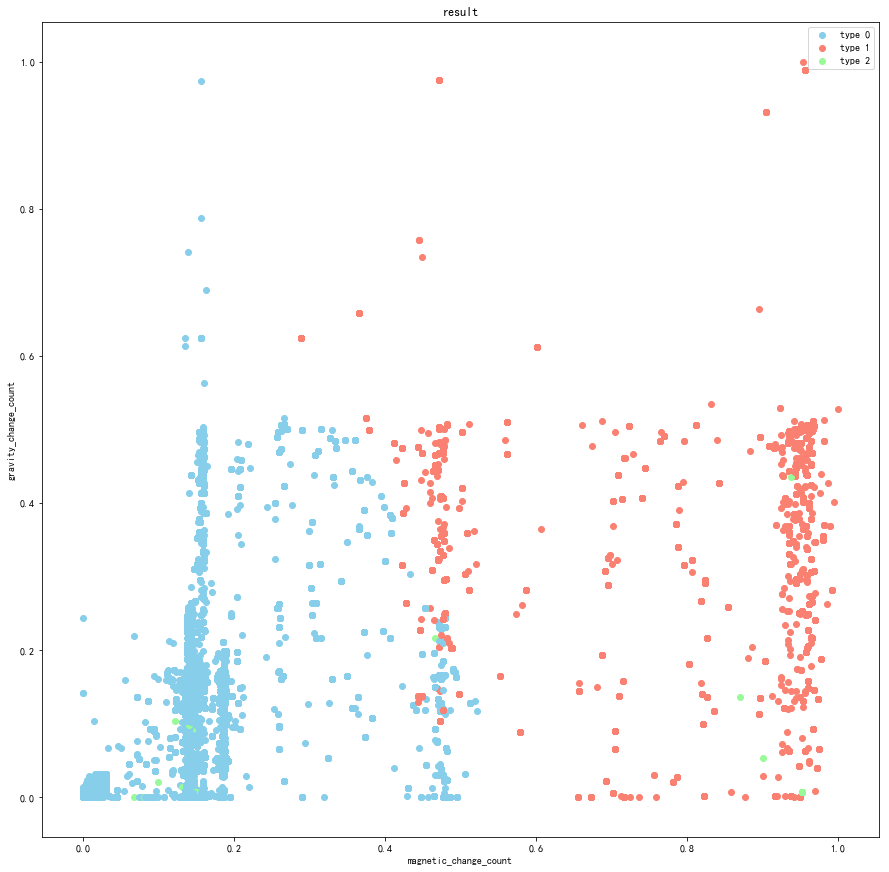

In [82]:
#绘制聚类结果散点图
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('result.csv',header =0)
fig = plt.figure()
for i in range(len(df)):
    if df.loc[i,'type'] == 0:
        plt0 = plt.scatter(x= df.loc[i,'magnetic_change_count'],y=df.loc[i,'gravity_change_count'],color = 'skyblue')
    if df.loc[i,'type'] == 1:
        plt1 = plt.scatter(x= df.loc[i,'magnetic_change_count'],y=df.loc[i,'gravity_change_count'],color = 'salmon')
    if df.loc[i,'type'] == 2:
        plt2 = plt.scatter(x= df.loc[i,'magnetic_change_count'],y=df.loc[i,'gravity_change_count'],color = 'palegreen') 
plt.xlabel('magnetic_change_count')
plt.ylabel('gravity_change_count')
plt.legend([plt0, plt1,plt2], ['type 0', 'type 1','type 2'])
plt.title('result')
plt.savefig('result.png')
plt.show()


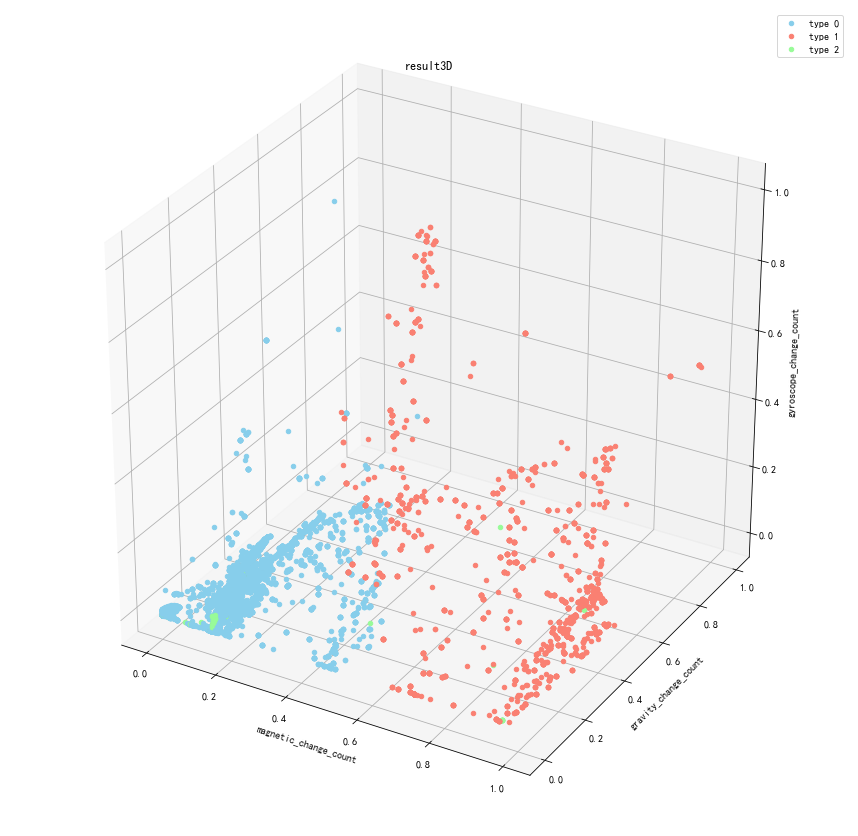

In [83]:
#绘制3D聚类结果图
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('result.csv',header =0)
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
for i in range(len(df)):
    if df.loc[i,'type'] == 0:
        plt0 = ax.scatter(df.loc[i,'magnetic_change_count'],df.loc[i,'gravity_change_count'],df.loc[i,'gyroscope_change_count'],color = 'skyblue')
    if df.loc[i,'type'] == 1:
        plt1 = ax.scatter(df.loc[i,'magnetic_change_count'],df.loc[i,'gravity_change_count'],df.loc[i,'gyroscope_change_count'],color = 'salmon')
    if df.loc[i,'type'] == 2:
        plt2 = ax.scatter(df.loc[i,'magnetic_change_count'],df.loc[i,'gravity_change_count'],df.loc[i,'gyroscope_change_count'],color = 'palegreen')
ax.set_zlabel('gyroscope_change_count')  # 坐标轴
ax.set_ylabel('gravity_change_count')
ax.set_xlabel('magnetic_change_count')
plt.legend([plt0, plt1,plt2], ['type 0', 'type 1','type 2'])
plt.title('result3D')
plt.savefig('result3D.png')
plt.show()